## Lattice 시계열 처리

파이썬의 Numpy 라이브러리만 있으면 됩니다.

In [1]:
import numpy as np

### Lattice 객체 생성

routines 모듈에서, produce_params 함수와 Lattice 클래스를 불러옵니다.

In [2]:
from RPS_routines import produce_params, Lattice

produce_params 함수는, 모빌리티 $M$과 격자 크기 $L$값, 그리고 predation, reproduction rate인 $k$와 $\rho$를 받아
확률값들 $p_\epsilon$(자리바꿈 확률), $p_k$(포식 확률), $p_\rho$(재생산 확률)를 리턴합니다 ($p_\epsilon+p_k+p_\rho=1$).

예시로

$L = 200$, <br>
$M = 6\times 10^{-4}$, <br>
$k = 1$, <br>
$\rho = 1$ <br>

일 때 확률 파라미터들을 구해 보면,

In [3]:
L = 200
M = 6*1e-4

params = produce_params(M, k=1, rho=1, L=L)

params

array([0.96, 0.02, 0.02])

이고, 위 아웃풋은

$p_\epsilon = 0.96$, <br>
$p_k = 0.02$, <br>
$p_\rho = 0.02$ <br>

임을 뜻합니다.

이 파라미터들을 이용해, 진화하는 Lattice를 만들 수 있습니다. 먼저 Lattice의 초깃값을 정하기 위해, Numpy의 random 모듈에서 randint 함수를 불러와, 자연수 1~3 으로 이루어진 임의의 $200\times 200$ 사이즈의 행렬을 만듭니다.

In [12]:
X_initial = np.random.randint(1,4,(L,L)) # 4는 미포함

X_initial # A(빨강): 1, B(파랑): 2, C(노랑): 3, 공백: 0

array([[2, 2, 3, ..., 2, 2, 1],
       [3, 3, 1, ..., 3, 2, 3],
       [1, 3, 3, ..., 2, 2, 3],
       ...,
       [1, 3, 1, ..., 1, 3, 2],
       [2, 1, 3, ..., 2, 2, 3],
       [3, 2, 1, ..., 2, 1, 2]])

이제, RPS_routines 모듈의 Lattice 클래스를 이용해, 초깃값 변수 X_initial과 확률파라미터 변수 params를 이용해 lattice를 선언합니다.

In [28]:
lattice = Lattice(X=X_initial, params=params)

lattice

이렇게 Lattice 클래스의 인스턴스(객체)를 만들고 나면,

1. X 속성을 통해 현재 격자의 값에 접근할 수 있고 (예상대로 X_initial과 동일하고, 크기는 200 x 200입니다)

In [29]:
lattice.X

array([[2, 2, 3, ..., 2, 2, 1],
       [3, 3, 1, ..., 3, 2, 3],
       [1, 3, 3, ..., 2, 2, 3],
       ...,
       [1, 3, 1, ..., 1, 3, 2],
       [2, 1, 3, ..., 2, 2, 3],
       [3, 2, 1, ..., 2, 1, 2]])

In [15]:
lattice.X.shape

(200, 200)

2. snapshot 메서드를 통해 해당 X값의 스냅샷을 그릴 수 있으며

Generation: 0


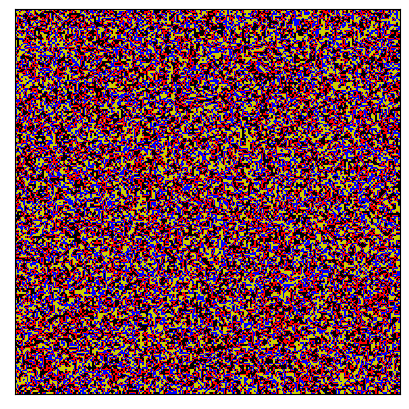

In [16]:
lattice.snapshot()

3. density() 메서드, status 속성 등을 활용해 종족 별 개체수, 멸종 여부 등을 확인할 수 있습니다.

In [17]:
lattice.density() # 왼쪽에서부터 빈칸, A, B, C의 밀도

array([0.      , 0.335175, 0.3322  , 0.332625])

In [18]:
lattice.status # 1이면 적어도 어느 한 종족은 멸종 상태, 0이면 공존상태

0

## Lattice 진화 시뮬레이션

이제 만든 lattice 객체의 evolve() 메서드를 이용하여 몬테 카를로 시뮬레이션을 시행하며 

'시뮬레이션 초기와 시뮬레이션이 끝나기 전 마지막 부분'

의 히스토리를 뽑아낼 수 있습니다 (멸종이 감지되면 중단됩니다). 

3000 세대를 시뮬레이션 하면서 초기와 마지막에서 각각 30개씩 50 제너레이션 간격으로 뽑아 보겠습니다.

Generation: 200


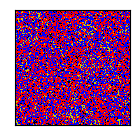

Generation: 400


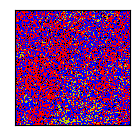

Generation: 600


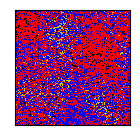

Generation: 800


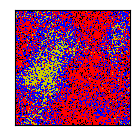

Generation: 1000


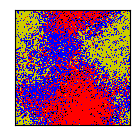

Generation: 1200


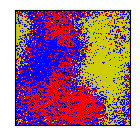

Generation: 1400


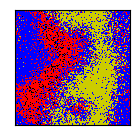

Generation: 1600


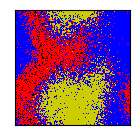

Generation: 1800


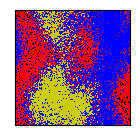

Generation: 2000


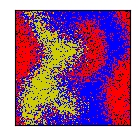

Generation: 2200


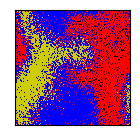

Generation: 2400


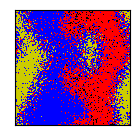

Generation: 2600


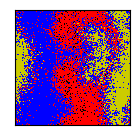

Generation: 2800


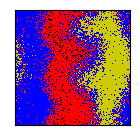

Generation: 3000


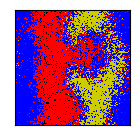

Evolution ended (6.021425 sec).
	Status: 0,             End generation: 3000
Generation: 3000


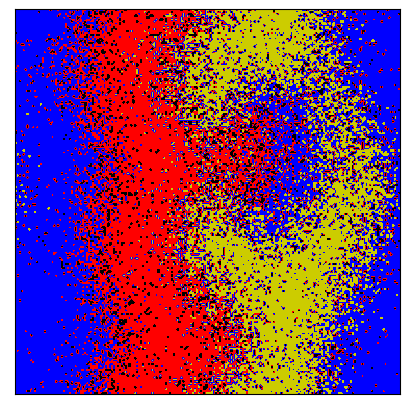

In [30]:
init_hist, last_hist = lattice.evolve(
    T=3000,                 # 돌릴 세대(generation) 수
    modify_self=True,       # True일 경우, 시뮬레이션 과정이 lattice에 업데이트 됨
    save_history=True,      # True일 경우, 초기와 마지막 히스토리를 리턴 (여기선 init_hist, last_hist)
    save_interval=50,       # 히스토리 저장 간격 (모빌리티 값과 비례하여 정해주는 것이 좋음)
    init_history_length=20, # 저장할 초기 히스토리 갯수 (0도 가능)
    last_history_length=10, # 저장할 마지막 히스토리 갯수 (0도 가능)
    show_evolution=True     # True일 경우, 진화과정의 스냅샷이 실시간으로 표시됨 (느려지므로 False 추천) 
)

앞서 modify_self=True 였으므로, 해당 시뮬레이션이 끝나고 난 뒤에도 그대로 이어서 더 할 수도 있습니다.

Generation: 3200


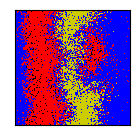

Generation: 3400


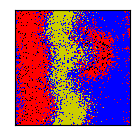

Evolution ended (0.981486 sec).
	Status: 0,             End generation: 3500
Generation: 3500


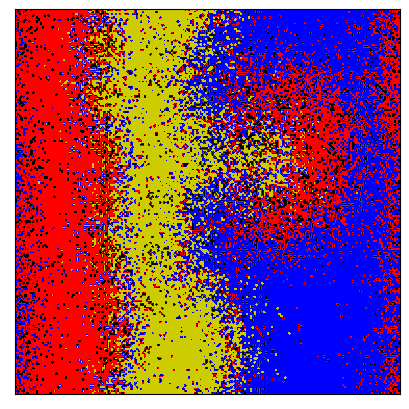

In [31]:
init_hist2, last_hist2 =  lattice.evolve(
    T=500,                 
    modify_self=True,       
    save_history=True,      
    save_interval=50,       
    init_history_length=3, 
    last_history_length=3, 
    show_evolution=True   
)

## 히스토리 조회법

이제 첫 시뮬레이션에서 리턴한 변수 init_hist와 last_hist에 진화과정의 초기와 마지막 히스토리가 저장이 되었는데, LatticeHistory 클래스의 변수 형태를 가지고 있습니다.

In [32]:
type(init_hist)

RPS_routines.LatticeHistory

히스토리의 hist 속성에는 save_interval 마다 저장된 세대별 lattice 객체들이 리스트로 기록이 되어 있습니다.

먼저 init_hist 변수에 대해서만 보면,

In [33]:
init_hist.hist

이렇게 init_history_length=20 이었으므로 길이 20을 갖는 리스트가 됩니다.

따라서 기록된 개별 lattice 객체를 다음과 같이 인덱스로 접근해 X값 조회, 스냅샷 보기 등 기존의 속성과 메서드들을 그대로 사용할 수 있습니다.

In [34]:
init_hist.hist[10]

In [35]:
init_hist.hist[10].X

array([[3, 0, 3, ..., 1, 0, 1],
       [2, 3, 0, ..., 0, 2, 0],
       [3, 1, 0, ..., 2, 0, 1],
       ...,
       [0, 3, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 2, 1, 1],
       [1, 1, 1, ..., 3, 0, 2]])

Generation: 500


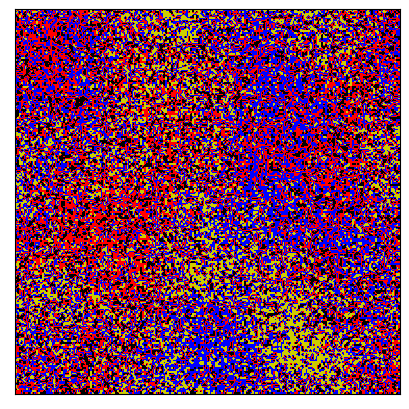

In [36]:
init_hist.hist[10].snapshot()

In [37]:
init_hist.hist[10].density()

array([0.229275, 0.2573  , 0.296   , 0.217425])

또한, 기록된 lattice들의 X값을 한꺼번에 보려면, 히스토리의 Xs 속성에 접근하면 됩니다.

In [38]:
init_hist.Xs

array([[[2, 2, 3, ..., 2, 2, 1],
        [3, 3, 1, ..., 3, 2, 3],
        [1, 3, 3, ..., 2, 2, 3],
        ...,
        [1, 3, 1, ..., 1, 3, 2],
        [2, 1, 3, ..., 2, 2, 3],
        [3, 2, 1, ..., 2, 1, 2]],

       [[2, 0, 1, ..., 1, 1, 2],
        [1, 2, 3, ..., 3, 1, 3],
        [3, 3, 3, ..., 1, 0, 0],
        ...,
        [3, 2, 2, ..., 1, 1, 3],
        [2, 1, 0, ..., 3, 2, 2],
        [1, 0, 1, ..., 0, 1, 1]],

       [[2, 2, 1, ..., 0, 3, 2],
        [1, 0, 0, ..., 2, 2, 2],
        [2, 0, 2, ..., 3, 1, 3],
        ...,
        [3, 1, 2, ..., 3, 0, 0],
        [1, 1, 1, ..., 0, 3, 1],
        [1, 0, 3, ..., 0, 3, 1]],

       ...,

       [[0, 0, 3, ..., 1, 1, 1],
        [1, 0, 1, ..., 0, 3, 0],
        [2, 3, 1, ..., 3, 0, 0],
        ...,
        [3, 3, 3, ..., 3, 3, 1],
        [1, 3, 1, ..., 3, 1, 3],
        [1, 1, 1, ..., 3, 3, 0]],

       [[3, 3, 3, ..., 3, 1, 3],
        [3, 2, 3, ..., 1, 2, 0],
        [0, 3, 1, ..., 3, 1, 0],
        ...,
        [3, 3, 1, ..., 

특정 세대의 값만 보려면, Numpy의 문법대로 다음과 같이 접근하면 됩니다.

Ex) 3번째 lattice 기록값 조회

In [39]:
init_hist.Xs[2] # init_hist.Xs[2,:,:] 과 같음

array([[2, 2, 1, ..., 0, 3, 2],
       [1, 0, 0, ..., 2, 2, 2],
       [2, 0, 2, ..., 3, 1, 3],
       ...,
       [3, 1, 2, ..., 3, 0, 0],
       [1, 1, 1, ..., 0, 3, 1],
       [1, 0, 3, ..., 0, 3, 1]])

## 기타 메서드

히스토리의 snapshots() 메서드를 사용하면 각 저장된 lattice들의 스냅샷을 한꺼번에 볼 수 있습니다.

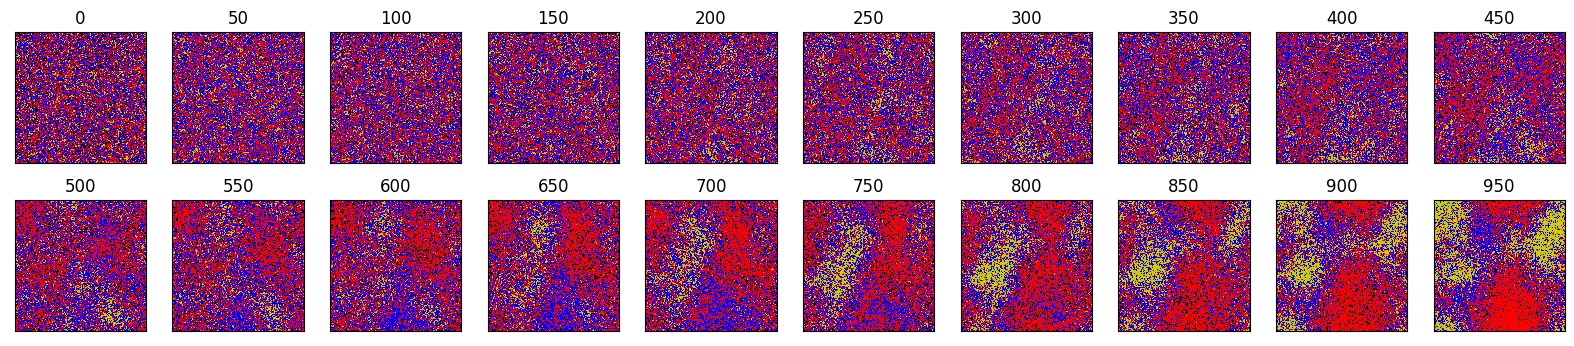

In [40]:
init_hist.snapshots()

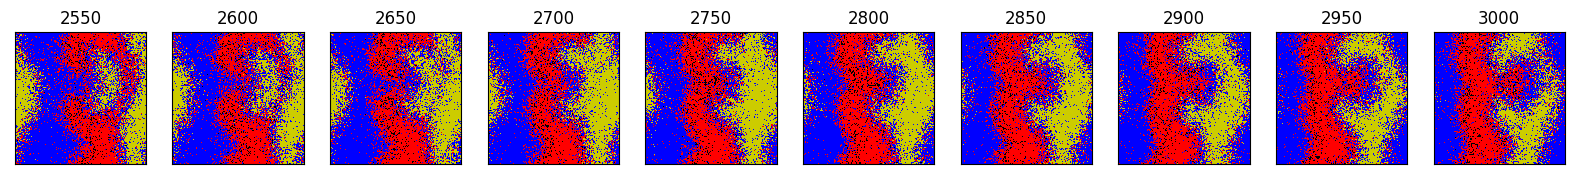

In [41]:
last_hist.snapshots()

densities() 메서드로 종족 별 개체 수 밀도 등을 리스트 형태로 구할 수 있고, (값은 y로 접근)

In [42]:
init_hist.densities().y

[array([0.      , 0.335175, 0.3322  , 0.332625]),
 array([0.221525, 0.26255 , 0.254525, 0.2614  ]),
 array([0.242   , 0.252875, 0.244475, 0.26065 ]),
 array([0.245425, 0.246675, 0.24405 , 0.26385 ]),
 array([0.2481  , 0.240475, 0.245175, 0.26625 ]),
 array([0.2475 , 0.23325, 0.2491 , 0.27015]),
 array([0.23875 , 0.2304  , 0.262125, 0.268725]),
 array([0.23975 , 0.2287  , 0.272775, 0.258775]),
 array([0.238725, 0.22965 , 0.285975, 0.24565 ]),
 array([0.23335 , 0.238275, 0.297625, 0.23075 ]),
 array([0.229275, 0.2573  , 0.296   , 0.217425]),
 array([0.224975, 0.275325, 0.293725, 0.205975]),
 array([0.2249 , 0.29435, 0.2822 , 0.19855]),
 array([0.2135  , 0.321075, 0.26665 , 0.198775]),
 array([0.208575, 0.3394  , 0.240325, 0.2117  ]),
 array([0.204975, 0.34545 , 0.213425, 0.23615 ]),
 array([0.202325, 0.353625, 0.18265 , 0.2614  ]),
 array([0.1933  , 0.355425, 0.164425, 0.28685 ]),
 array([0.1873 , 0.3381 , 0.15605, 0.31855]),
 array([0.168725, 0.313625, 0.163175, 0.354475])]

densities()에 plot() 메서드를 덧붙이면 그래프로 플롯 할 수 있습니다 (xlim, ylim 등을 인수로 넘겨 x축 범위, y축 범위 등을 지정 할 수 있습니다)

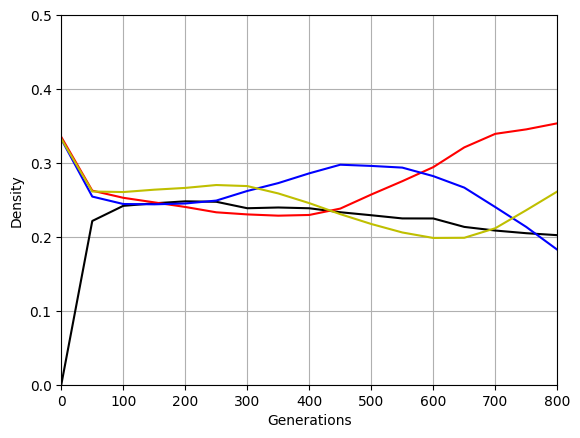

In [43]:
init_hist.densities().plot(xlim=[0,800],ylim=[0,0.5])